In [169]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [170]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [207]:
data = pd.read_csv('../data/완성data/new_select_data.csv')

In [208]:
# 원하는 컬럼 순서 지정
col = ['부서별_인력구성(생산)', '부서별_인력구성(RnD)', '총자산회전율', '순이익률', 'ROE',
       '주력제품 국내 시장점유율(퍼센트)', '학력별 인력구성비(대졸)',
       '엔젤투자자 혹은 액셀러레이터 투자 경험여부', '창업 당시 창업자 최종학력', '창업 직전 근무지',
       '창업 당시 목표시장', '해외수출 및 진출과정 애로사항', '연구개발관련전담부서보유여부', '벤처확인 유형',
       '벤처캐피털(투자조합포함) 투자 경험여부']

# 컬럼 순서 변경
data = data.reindex(columns=col)

In [209]:
data['창업 당시 목표시장'] = data['창업 당시 목표시장'].astype('int64')
data['해외수출 및 진출과정 애로사항'] = data['해외수출 및 진출과정 애로사항'].astype('int64')
data['연구개발관련전담부서보유여부'] = data['연구개발관련전담부서보유여부'].astype('int64')

In [210]:
data.drop('벤처확인 유형', axis=1, inplace=True)

In [211]:
data = data[[col for col in data.columns if col != '벤처캐피털(투자조합포함) 투자 경험여부'] + ['벤처캐피털(투자조합포함) 투자 경험여부']]

In [212]:
data

,부서별_인력구성(생산),부서별_인력구성(RnD),총자산회전율,순이익률,ROE,주력제품 국내 시장점유율(퍼센트),학력별 인력구성비(대졸),엔젤투자자 혹은 액셀러레이터 투자 경험여부,창업 당시 창업자 최종학력,창업 직전 근무지,창업 당시 목표시장,해외수출 및 진출과정 애로사항,연구개발관련전담부서보유여부,벤처캐피털(투자조합포함) 투자 경험여부
0,0.000,40.000,0.056,-1739.260,360.366,1.00,46.667,0,3,6,1,2,1,1
1,0.000,20.000,182.613,3.063,20.487,1.00,20.000,0,4,6,1,8,3,0
2,0.000,13.333,47.157,8.065,5.656,10.00,13.333,0,2,6,1,4,1,0
3,26.627,23.669,55.927,-6.119,-13.836,30.00,20.000,0,2,6,3,3,1,0
4,28.182,22.727,69.228,-11.386,-16.891,30.00,20.000,0,2,6,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,0.000,36.364,78.543,-11.720,-26.679,0.01,81.818,0,3,6,1,1,1,0
12380,50.000,6.667,603.905,2.822,44.500,15.00,40.000,0,3,10,3,2,3,0
12381,0.000,1.923,385.063,-0.801,-15.723,1.00,48.077,0,3,6,1,5,1,0
12382,0.000,20.690,511.376,2.205,37.902,5.00,90.000,0,3,5,1,2,2,0


# oversampling

In [213]:
from imblearn.over_sampling import RandomOverSampler

In [214]:
# 독립변수와 종속변수 설정
X = data.iloc[:,:-1]
y = data['벤처캐피털(투자조합포함) 투자 경험여부']

# 다수 클래스는 그대로 두고 소수 클래스만 늘리는 RandomOverSampler 객체 생성
ros = RandomOverSampler(sampling_strategy={1: 5734}, random_state=0)

# 리샘플링 수행
X_resampled, y_resampled = ros.fit_resample(X, y)

print(X_resampled.shape, y_resampled.shape)

(17201, 13) (17201,)


In [215]:
# 오버샘플링된 데이터를 데이터프레임으로 변환
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['벤처캐피털(투자조합포함) 투자 경험여부'] = y_resampled

In [216]:
print(len(df_resampled[df_resampled['벤처캐피털(투자조합포함) 투자 경험여부'] == 1]))
print(len(df_resampled[df_resampled['벤처캐피털(투자조합포함) 투자 경험여부'] == 0]))

5734
11467


In [217]:
df = df_resampled
df

,부서별_인력구성(생산),부서별_인력구성(RnD),총자산회전율,순이익률,ROE,주력제품 국내 시장점유율(퍼센트),학력별 인력구성비(대졸),엔젤투자자 혹은 액셀러레이터 투자 경험여부,창업 당시 창업자 최종학력,창업 직전 근무지,창업 당시 목표시장,해외수출 및 진출과정 애로사항,연구개발관련전담부서보유여부,벤처캐피털(투자조합포함) 투자 경험여부
0,0.000,40.000,0.056,-1739.260,360.366,1.0,46.667,0,3,6,1,2,1,1
1,0.000,20.000,182.613,3.063,20.487,1.0,20.000,0,4,6,1,8,3,0
2,0.000,13.333,47.157,8.065,5.656,10.0,13.333,0,2,6,1,4,1,0
3,26.627,23.669,55.927,-6.119,-13.836,30.0,20.000,0,2,6,3,3,1,0
4,28.182,22.727,69.228,-11.386,-16.891,30.0,20.000,0,2,6,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17196,50.000,33.333,138.768,7.576,17.111,0.9,48.333,0,3,6,3,3,1,1
17197,2.609,12.174,95.376,0.511,0.738,15.0,53.000,0,3,6,3,3,1,1
17198,51.149,13.218,99.207,-11.671,-13.848,8.0,88.000,0,3,6,3,2,3,1
17199,44.444,33.333,122.338,-18.471,-29.392,4.0,66.667,0,2,6,3,3,1,1


In [14]:
# df.to_csv('NoEncodingNoScaling_data.csv', index=False)

# Scaling

> MinMaxScaler

In [163]:
from sklearn.preprocessing import MinMaxScaler

In [164]:
# 비율형 변수만 분리
tran_df = df.iloc[:,:7]

In [165]:
# 분리한 데이터 Scaling
mm = MinMaxScaler()
mm_tran_df = mm.fit_transform(tran_df)
mm_tran_df = pd.DataFrame(mm_tran_df, columns=tran_df.columns)

In [166]:
# 원본데이터에 Scaling 데이터 치환
df.iloc[:,:7] = mm_tran_df

In [84]:
# df.to_csv('NoEncodingMMS_data_2vs1.csv', index=False)

> StandardScaler

In [199]:
from sklearn.preprocessing import StandardScaler

In [200]:
# 비율형 변수만 분리
tran_df = df.iloc[:,:7]

In [201]:
# 분리한 데이터 Scaling
sc = StandardScaler()
sc_tran_df = sc.fit_transform(tran_df)
sc_tran_df = pd.DataFrame(sc_tran_df, columns=tran_df.columns)

In [202]:
# 원본데이터에 Scaling 데이터 치환
df.iloc[:,:7] = sc_tran_df

In [203]:
df

,부서별_인력구성(생산),부서별_인력구성(RnD),총자산회전율,순이익률,ROE,주력제품 국내 시장점유율(퍼센트),학력별 인력구성비(대졸),엔젤투자자 혹은 액셀러레이터 투자 경험여부,창업 당시 창업자 최종학력,창업 직전 근무지,창업 당시 목표시장,해외수출 및 진출과정 애로사항,연구개발관련전담부서보유여부,벤처캐피털(투자조합포함) 투자 경험여부
0,-1.250483,0.834455,-0.941060,-9.007997,2.296662,-0.653357,-0.137171,0,3,6,1,2,1,1
1,-1.250483,-0.139647,0.486564,0.173688,0.138390,-0.653357,-1.234618,0,4,6,1,8,3,0
2,-1.250483,-0.464364,-0.572723,0.200048,0.044212,-0.124734,-1.508991,0,2,6,1,4,1,0
3,-0.226495,0.039052,-0.504140,0.125301,-0.079565,1.049983,-1.234618,0,2,6,3,3,1,0
4,-0.166694,-0.006828,-0.400124,0.097545,-0.098964,1.049983,-1.234618,0,2,6,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17196,0.672356,0.509738,0.143689,0.197471,0.116952,-0.659230,-0.068609,0,3,6,3,3,1,1
17197,-1.150150,-0.520813,-0.195643,0.160239,0.012982,0.168945,0.123456,0,3,6,3,3,1,1
17198,0.716543,-0.469965,-0.165684,0.096043,-0.079641,-0.242206,1.563838,0,3,6,3,2,3,1
17199,0.458690,0.509738,0.015204,0.060208,-0.178347,-0.477149,0.685905,0,2,6,3,3,1,1


In [204]:
# df.to_csv('NoEncodingSTS_data_2vs1.csv', index=False)

# Catboost 교차검증

In [102]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
import shap
from sklearn.model_selection import StratifiedKFold

In [218]:
# 특징 변수와 타겟 변수 분리
X = df.iloc[:, :-1]
y = df['벤처캐피털(투자조합포함) 투자 경험여부']

In [219]:
# Scaling 안한 결과

from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold

# CatBoost 모델 생성
model = CatBoostClassifier(verbose=False)

# Stratified 5-fold 교차검증
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# 교차검증 결과 저장 변수
accuracy_scores = []
f1_scores = []
recall_scores = []
confusion_matrices = []

for train_index, test_index in skf.split(X, y):
    # 학습 데이터와 검증 데이터 분할
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # CatBoost 모델 학습
    model.fit(X_train, y_train)

    # 검증 데이터 예측
    y_pred = model.predict(X_test)

    # 평가 지표 계산
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # 결과 저장
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    confusion_matrices.append(confusion)

# 평균 정확도, F1 점수, 재현율 출력
print('Mean Accuracy:', np.mean(accuracy_scores))
print('Mean F1 Score:', np.mean(f1_scores))
print('Mean Recall:', np.mean(recall_scores))

# 혼돈 행렬 출력
for i, confusion in enumerate(confusion_matrices):
    print(f'Confusion Matrix {i+1}:')
    print(confusion)
    print()

Mean Accuracy: 0.9094235045247798
Mean F1 Score: 0.8601927773792173
Mean Recall: 0.8358922509741629
Confusion Matrix 1:
[[2188  106]
 [ 184  963]]

Confusion Matrix 2:
[[2169  124]
 [ 203  944]]

Confusion Matrix 3:
[[2158  135]
 [ 194  953]]

Confusion Matrix 4:
[[2169  124]
 [ 179  968]]

Confusion Matrix 5:
[[2166  128]
 [ 181  965]]



In [168]:
# MinMaxScaling 한 결과

from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold

# CatBoost 모델 생성
model = CatBoostClassifier(verbose=False)

# Stratified 5-fold 교차검증
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# 교차검증 결과 저장 변수
accuracy_scores = []
f1_scores = []
recall_scores = []
confusion_matrices = []

for train_index, test_index in skf.split(X, y):
    # 학습 데이터와 검증 데이터 분할
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # CatBoost 모델 학습
    model.fit(X_train, y_train)

    # 검증 데이터 예측
    y_pred = model.predict(X_test)

    # 평가 지표 계산
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # 결과 저장
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    confusion_matrices.append(confusion)

# 평균 정확도, F1 점수, 재현율 출력
print('Mean Accuracy:', np.mean(accuracy_scores))
print('Mean F1 Score:', np.mean(f1_scores))
print('Mean Recall:', np.mean(recall_scores))

# 혼돈 행렬 출력
for i, confusion in enumerate(confusion_matrices):
    print(f'Confusion Matrix {i+1}:')
    print(confusion)
    print()

Mean Accuracy: 0.9094235045247798
Mean F1 Score: 0.8601927773792173
Mean Recall: 0.8358922509741629
Confusion Matrix 1:
[[2188  106]
 [ 184  963]]

Confusion Matrix 2:
[[2169  124]
 [ 203  944]]

Confusion Matrix 3:
[[2158  135]
 [ 194  953]]

Confusion Matrix 4:
[[2169  124]
 [ 179  968]]

Confusion Matrix 5:
[[2166  128]
 [ 181  965]]



In [206]:
# Standard Scaling 한 결과

from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold

# CatBoost 모델 생성
model = CatBoostClassifier(verbose=False)

# Stratified 5-fold 교차검증
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# 교차검증 결과 저장 변수
accuracy_scores = []
f1_scores = []
recall_scores = []
confusion_matrices = []

for train_index, test_index in skf.split(X, y):
    # 학습 데이터와 검증 데이터 분할
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # CatBoost 모델 학습
    model.fit(X_train, y_train)

    # 검증 데이터 예측
    y_pred = model.predict(X_test)

    # 평가 지표 계산
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # 결과 저장
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    confusion_matrices.append(confusion)

# 평균 정확도, F1 점수, 재현율 출력
print('Mean Accuracy:', np.mean(accuracy_scores))
print('Mean F1 Score:', np.mean(f1_scores))
print('Mean Recall:', np.mean(recall_scores))

# 혼돈 행렬 출력
for i, confusion in enumerate(confusion_matrices):
    print(f'Confusion Matrix {i+1}:')
    print(confusion)
    print()

Mean Accuracy: 0.9094235045247798
Mean F1 Score: 0.8601927773792173
Mean Recall: 0.8358922509741629
Confusion Matrix 1:
[[2188  106]
 [ 184  963]]

Confusion Matrix 2:
[[2169  124]
 [ 203  944]]

Confusion Matrix 3:
[[2158  135]
 [ 194  953]]

Confusion Matrix 4:
[[2169  124]
 [ 179  968]]

Confusion Matrix 5:
[[2166  128]
 [ 181  965]]



# SHAP 계산 및 시각화

In [18]:
from sklearn.model_selection import train_test_split
shap.initjs() # javascript 초기화 (graph 초기화)

In [20]:
# 특징 변수와 타겟 변수 분리
X = df.iloc[:, :-1]
y = df['벤처캐피털(투자조합포함) 투자 경험여부']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.columns

Index(['부서별_인력구성(생산)', '부서별_인력구성(RnD)', '총자산회전율', '순이익률', 'ROE',
       '주력제품 국내 시장점유율(퍼센트)', '학력별 인력구성비(대졸)', '엔젤투자자 혹은 액셀러레이터 투자 경험여부',
       '창업 당시 창업자 최종학력', '창업 직전 근무지', '창업 당시 목표시장', '해외수출 및 진출과정 애로사항',
       '연구개발관련전담부서보유여부'],
      dtype='object')

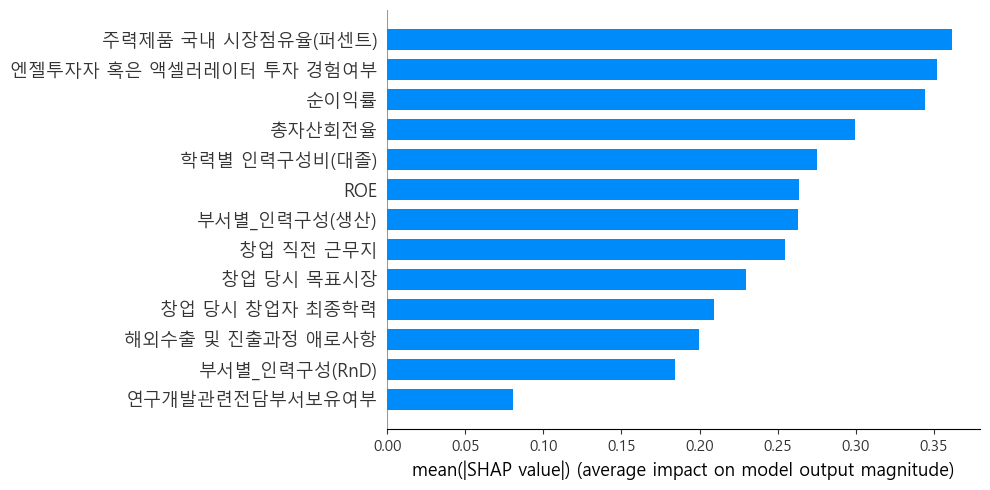

In [23]:
# CatBoost 모델 학습
model = CatBoostClassifier(verbose=False, cat_features=['엔젤투자자 혹은 액셀러레이터 투자 경험여부',
       '창업 당시 창업자 최종학력', '창업 직전 근무지', '창업 당시 목표시장', '해외수출 및 진출과정 애로사항',
       '연구개발관련전담부서보유여부'])
model.fit(X_train, y_train)

# Tree SHAP Explainer 생성
explainer = shap.TreeExplainer(model)

# Tree SHAP 값을 계산
shap_values = explainer.shap_values(X_test)

# 특정 샘플의 Shap 요약 확인
sample_index = 0
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="bar", plot_size=(10, 5))

# 특정 샘플의 Shap 값 확인
shap.force_plot(explainer.expected_value, shap_values[sample_index], X_test.iloc[sample_index, :], feature_names=X.columns)

In [24]:
feature_name = X.columns

for i in range(X.shape[1]):
    feature_imp = np.mean(np.abs(shap_values[:, i]))
    print(f'{feature_name[i]}의 중요도 :', feature_imp)

부서별_인력구성(생산)의 중요도 : 0.26316184848173174
부서별_인력구성(RnD)의 중요도 : 0.18419292867294493
총자산회전율의 중요도 : 0.2995987440565162
순이익률의 중요도 : 0.3444983695040025
ROE의 중요도 : 0.2633534432214727
주력제품 국내 시장점유율(퍼센트)의 중요도 : 0.36148244671235913
학력별 인력구성비(대졸)의 중요도 : 0.2753202946005087
엔젤투자자 혹은 액셀러레이터 투자 경험여부의 중요도 : 0.35193653821755516
창업 당시 창업자 최종학력의 중요도 : 0.20935397440122872
창업 직전 근무지의 중요도 : 0.25438902482269465
창업 당시 목표시장의 중요도 : 0.22947241782157066
해외수출 및 진출과정 애로사항의 중요도 : 0.19935586743973577
연구개발관련전담부서보유여부의 중요도 : 0.08081509355475829


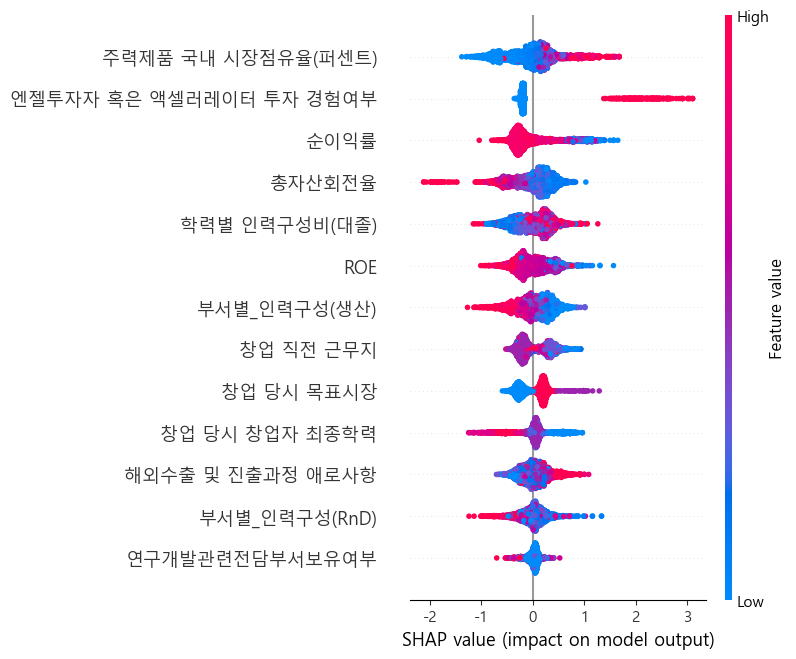

In [25]:
# summary
shap.summary_plot(shap_values, X_test)

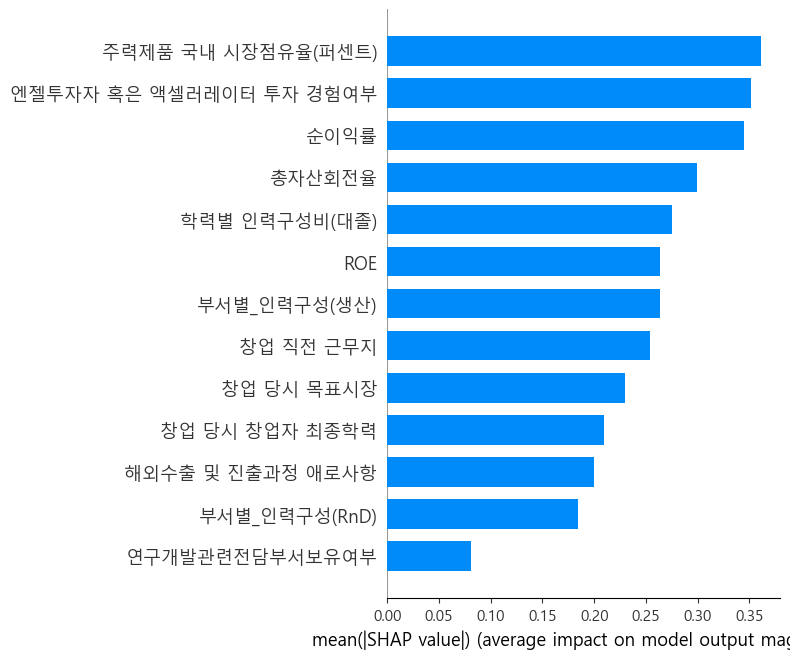

In [26]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

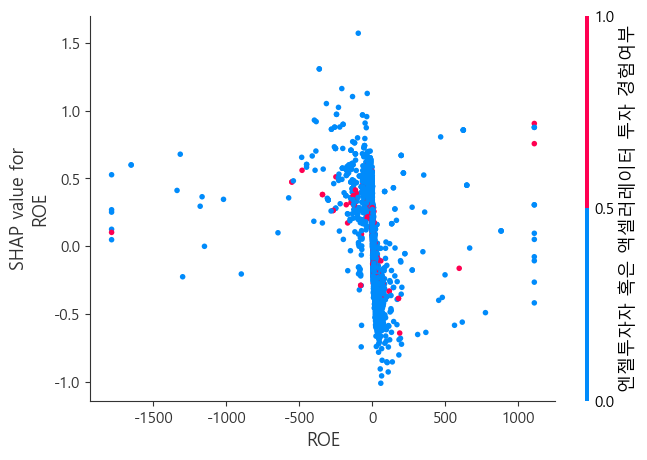

In [29]:
import shap
import matplotlib.pyplot as plt

# '부서별_인력구성(생산)' 변수와 '순이익률' 변수의 인덱스 찾기
feature_index = X.columns.get_loc('ROE')
target_index = X.columns.get_loc('엔젤투자자 혹은 액셀러레이터 투자 경험여부')

# shap.dependence_plot 생성
shap.dependence_plot(feature_index, shap_values, X_test, interaction_index=target_index)
plt.show()